In [15]:
include("conv_2d.jl")
using Images,TestImages
using NNlib
using BenchmarkTools

In [2]:
img2tensor(img)=convert(Array{Float64},img)
tensor2img(tensor)=convert(Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2},max.(0.,min.(tensor,1.)))

tensor2img (generic function with 1 method)

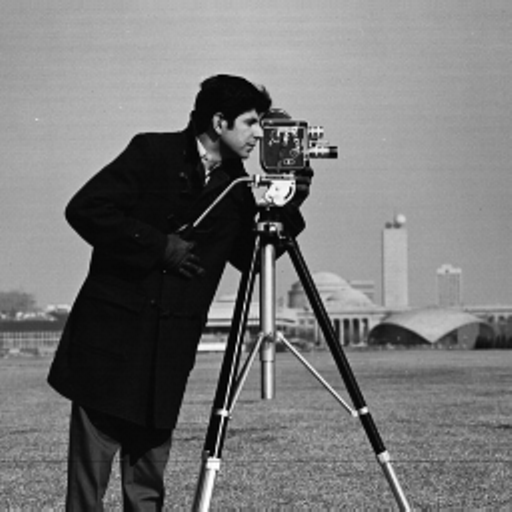

In [3]:
img =testimage("cameraman")

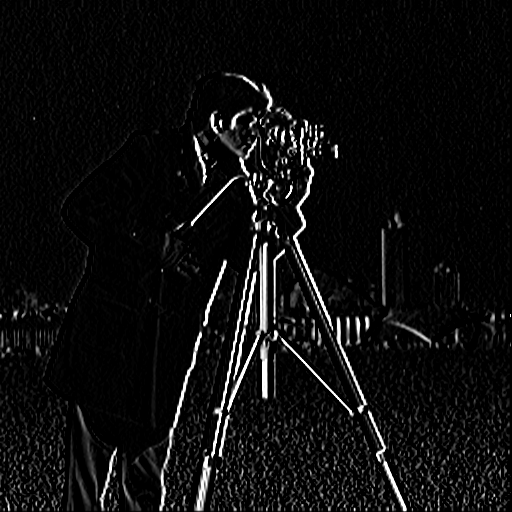

In [4]:
fil=[-1. -2. -1.; 0. 0. 0.; 1. 2. 1.]'
tensor=img2tensor(img)
dest=zeros(512,512)
apply_filter_on_img!(tensor,fil,dest,(1,1),(1,1))
tensor2img(dest)

In [5]:
@benchmark apply_filter_on_img!($tensor,$fil,$dest,(1,1),(1,1))

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     3.416 ms (0.00% GC)
  median time:      4.495 ms (0.00% GC)
  mean time:        4.673 ms (0.00% GC)
  maximum time:     10.543 ms (0.00% GC)
  --------------
  samples:          1067
  evals/sample:     1

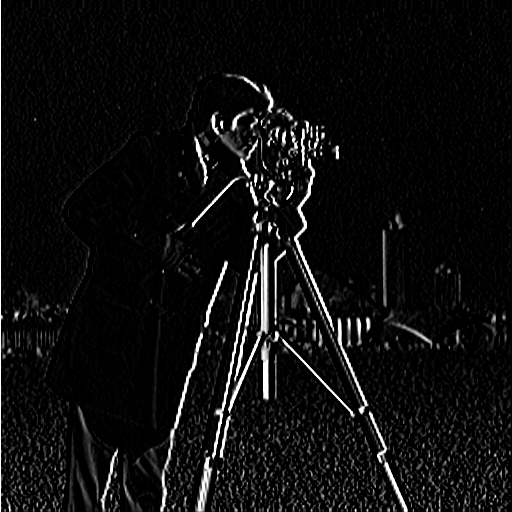

In [6]:
imker=centered(fil)
dest2 = imfilter(tensor, imker, Fill(0.))
tensor2img(dest2)

In [7]:
@benchmark imfilter(tensor, imker, Fill(0.))

BenchmarkTools.Trial: 
  memory estimate:  4.09 MiB
  allocs estimate:  409
  --------------
  minimum time:     1.696 ms (0.00% GC)
  median time:      3.129 ms (0.00% GC)
  mean time:        3.596 ms (16.91% GC)
  maximum time:     302.234 ms (99.10% GC)
  --------------
  samples:          1386
  evals/sample:     1

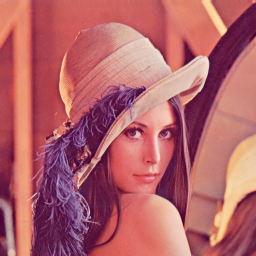

In [5]:
img_lena =testimage("lena")

In [16]:
ch_lena=channelview(img_lena)
tensor_lena=zeros(256,256,3,2)
for i=1:2
    for j=1:3
        tensor_lena[:,:,j,i]=ch_lena[j,:,:]
    end
end
fil_lena=rand(3,3,3,4)
dest_lena=zeros(256,256,4,2)
conv_2d!(tensor_lena,fil_lena,dest_lena,(1,1),(1,1))

In [17]:
@benchmark conv_2d!($tensor_lena,$fil_lena,$dest_lena,(1,1),(1,1))

BenchmarkTools.Trial: 
  memory estimate:  4.50 KiB
  allocs estimate:  72
  --------------
  minimum time:     23.095 ms (0.00% GC)
  median time:      26.564 ms (0.00% GC)
  mean time:        28.073 ms (0.00% GC)
  maximum time:     50.655 ms (0.00% GC)
  --------------
  samples:          179
  evals/sample:     1

In [47]:
NNlib.conv2d!(dest_lena,tensor_lena,fil_lena,padding=1,stride=1);

In [48]:
@benchmark NNlib.conv2d!($dest_lena,$tensor_lena,$fil_lena,padding=1,stride=1)

BenchmarkTools.Trial: 
  memory estimate:  16.50 MiB
  allocs estimate:  15
  --------------
  minimum time:     11.034 ms (0.00% GC)
  median time:      14.765 ms (7.92% GC)
  mean time:        14.726 ms (12.83% GC)
  maximum time:     25.047 ms (26.10% GC)
  --------------
  samples:          340
  evals/sample:     1

In [52]:
using ProfileView
Profile.clear()

In [55]:
@profile conv_2d!(tensor_lena,fil_lena,dest_lena,(1,1),(1,1))

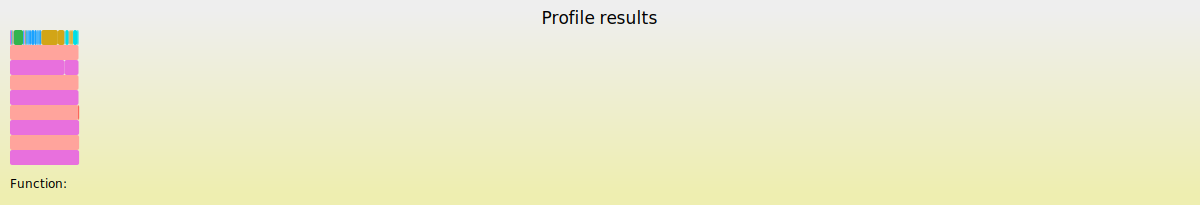

In [56]:
ProfileView.view()

In [9]:
cld(1,1)

1

In [22]:
A=rand(100,100)
@benchmark for i=1:100 for j=1:100 A[i,j] end end

BenchmarkTools.Trial: 
  memory estimate:  156.25 KiB
  allocs estimate:  10000
  --------------
  minimum time:     261.121 μs (0.00% GC)
  median time:      262.622 μs (0.00% GC)
  mean time:        276.362 μs (0.00% GC)
  maximum time:     1.076 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [63]:
eachindex(A)

Base.OneTo(10000)